## Final Project Submission

Please fill out:
* Student name: Betshua Kerubo
* Student pace: full time
* Scheduled project review date/time: 9/7/2023
* Instructor name:Veronica Isiaho 
* Blog post URL:


## Data Understanding

In [3]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
import folium
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

## Loading the Dataset

In [4]:
kc_data= pd.read_csv('data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [5]:
#getting basic information about the data
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataset has 21 columns:

 - 6 categorical and 15 numerical columns.
 - It has as a total of 21597 rows, the columns with a non null count of less than 21597 show existence of some missing values.

In [6]:
#getting general summary statistics  on the data
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


## Data Pre-processing

Involves manipulation, dropping or cleaning of data before it is used in order to ensure or enhance performance.

### Identifying and dealing with missing values

In [7]:
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(kc_data)
missing_data

,Missing Values,Percentage(%)
yr_renovated,3842,0.18
waterfront,2376,0.11
view,63,0.00


 - The threshold on how to deal with missing values commonly used is 50% and also depends on the specific column. The percentages of missing values are very low for the specific columns so we can replace.
 - The percentage of the missing values for waterfront column(11.00%), view column(0.29%) and year renovated column(17.70%) are less than 50% , so we can replace them.
 - Checking the year renovated column we may assume the missing value is because the house was never renovated, maybe the house did not have a view or a waterfront also for the other two columns hence we can Fill them with zeros.
 - Since the missing values in the 3 columns are categorical and are a small percentage of the columns, replacing them with mode won't skew the data nor give false conclusions

In [8]:
def filling_missing_values(data, columns):
    missing = missing_values(data) # store the output of missing_values function
    for col in columns:
        if col in missing.index: # check if column has missing values
            data[col] = data[col].fillna(data[col].mode()[0]) # fill missing values with mode
    return data
filling_missing_values(kc_data, ['waterfront','yr_renovated','view'])

kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Duplicates

In [9]:
def check_duplicates(data):
    """
    A simple function to check for duplicates in a given dataset.
    """
    duplicates = data.duplicated().sum()
    return duplicates
check_duplicates(kc_data)

0

There are no duplicates in the data.

### Checking duplicated id

In [10]:
duplicates_id = kc_data[kc_data.duplicated(subset=['id'], keep=False)]
duplicates_id

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.00,3,1.50,1580,5000,1.00,NO,NONE,...,8 Good,1290,290.0,1939,0.00,98117,47.69,-122.39,1570,4500
94,6021501535,12/23/2014,700000.00,3,1.50,1580,5000,1.00,NO,NONE,...,8 Good,1290,290.0,1939,0.00,98117,47.69,-122.39,1570,4500
313,4139480200,6/18/2014,1380000.00,4,3.25,4290,12103,1.00,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.00,98006,47.55,-122.10,3860,11244
314,4139480200,12/9/2014,1400000.00,4,3.25,4290,12103,1.00,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.00,98006,47.55,-122.10,3860,11244
324,7520000520,9/5/2014,232000.00,2,1.00,1240,12092,1.00,NO,NONE,...,6 Low Average,960,280.0,1922,1984.00,98146,47.50,-122.35,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.00,4,2.50,2680,5539,2.00,NO,NONE,...,8 Good,2680,0.0,2013,0.00,98045,47.48,-121.73,2680,5992
20763,6300000226,6/26/2014,240000.00,4,1.00,1200,2171,1.50,NO,NONE,...,7 Average,1200,0.0,1933,0.00,98133,47.71,-122.34,1130,1598
20764,6300000226,5/4/2015,380000.00,4,1.00,1200,2171,1.50,NO,NONE,...,7 Average,1200,0.0,1933,0.00,98133,47.71,-122.34,1130,1598
21564,7853420110,10/3/2014,594866.00,3,3.00,2780,6000,2.00,NO,NONE,...,9 Better,2780,0.0,2013,0.00,98065,47.52,-121.89,2850,6000


 - The id column shows the unique identifier for a house.
 - While there are duplicated ids of a house the prices and dates (of sale) of the house were different- hence why there were no duplicated rows- meaning the duplicated ids represent a house that was sold multiple times.

### Data inconsistencies

In [11]:
def print_value_counts(df):
    for column in df.columns:
        # Print the column name
        print("Value counts for {} column:".format(column))
        # Print the value counts for the column
        print(df[column].value_counts())
        # Add a separator for clarity
        print("="*30)

print_value_counts(kc_data)

Value counts for id column:
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
Value counts for date column:
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
8/3/2014       1
7/27/2014      1
5/17/2014      1
11/2/2014      1
5/15/2015      1
Name: date, Length: 372, dtype: int64
Value counts for price column:
350000.00    172
450000.00    172
550000.00    159
500000.00    152
425000.00    150
            ... 
870515.00      1
336950.00      1
386100.00      1
176250.00      1
884744.00      1
Name: price, Length: 3622, dtype: int64
Value counts for bedrooms column:
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
Value counts for bathrooms column:
2.50    5377
1.

In [12]:
def find_inconsistent_data(df):
    # Identify potential data inconsistencies
    inconsistent_bedrooms = df[(df['bedrooms'] == 10) | (df['bedrooms'] == 11) | (df['bedrooms'] == 33)]
    inconsistent_bathrooms = df[(df['bathrooms'] == 7) | (df['bathrooms'] == 8)]

    # Concatenate the inconsistent data into a single DataFrame
    inconsistent_data = pd.concat([inconsistent_bedrooms, inconsistent_bathrooms])
inconsistent_data = find_inconsistent_data(kc_data)
inconsistent_data

The square foot basement column has a placeholder value,?.

In [13]:
def place_holders(data, column):
    inconsistent = data[data[column] == '?']
    data[column].replace('?', 0.0, regex=False, inplace=True)

place_holders(kc_data, 'sqft_basement')

 - When the number of bedrooms is greater than 10, the value in the sqft_living and sqft_lot a too little to match to that record meaning there is most likely an error in data entry. Therefore it's best drop that column.

 - It has 454 placeholder values, dropping the would mean loss of valuable data in the other columns.

 - The placeholder would have most likely have been used to show that the house has no basement, we can therefore replace these placeholder values with the mode ie 0.

 - The placeholder values constitute 2% of the column so imputing the data won't skew the data.

 - We noticed that sqft_basement feature was categorica (object type) instead of numerical so we have to change it.

In [14]:
#changing the data type of the column because it contains numerical values
kc_data['sqft_basement']=kc_data['sqft_basement'].astype(float)

### Outliers

In [15]:
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15,5))
    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))

        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.show()

IQR for price column: 323000.0
Number of outliers in price column: 1158
IQR for sqft_lot column: 5645.0
Number of outliers in sqft_lot column: 2419
IQR for sqft_above column: 1020.0
Number of outliers in sqft_above column: 610
IQR for sqft_lot column: 5645.0
Number of outliers in sqft_lot column: 2419
IQR for sqft_living15 column: 870.0
Number of outliers in sqft_living15 column: 543
IQR for sqft_lot15 column: 4983.0
Number of outliers in sqft_lot15 column: 2188


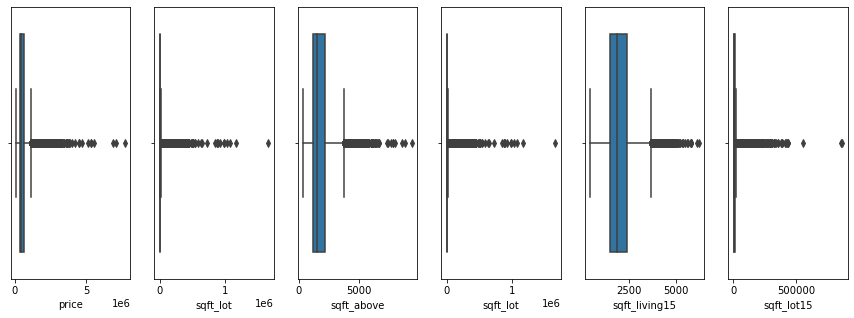

In [16]:
check_outliers(kc_data, ['price', 'sqft_lot', 'sqft_above','sqft_lot','sqft_living15','sqft_lot15'])

C:\Users\dell\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


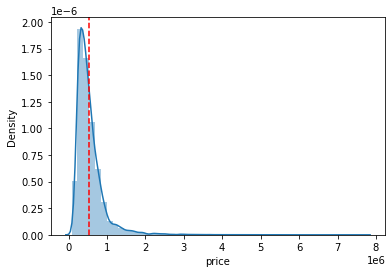

In [17]:
sns.distplot(kc_data['price'])
mean = kc_data['price'].mean()
plt.axvline(x=mean, color='r', linestyle='--')
plt.show()

The data has outliers but we cannot eliminate them cause they actually provide valuable information.

## Exploratory Data Analysis

### Univariate EDA

Checking for the distribution of individual columns

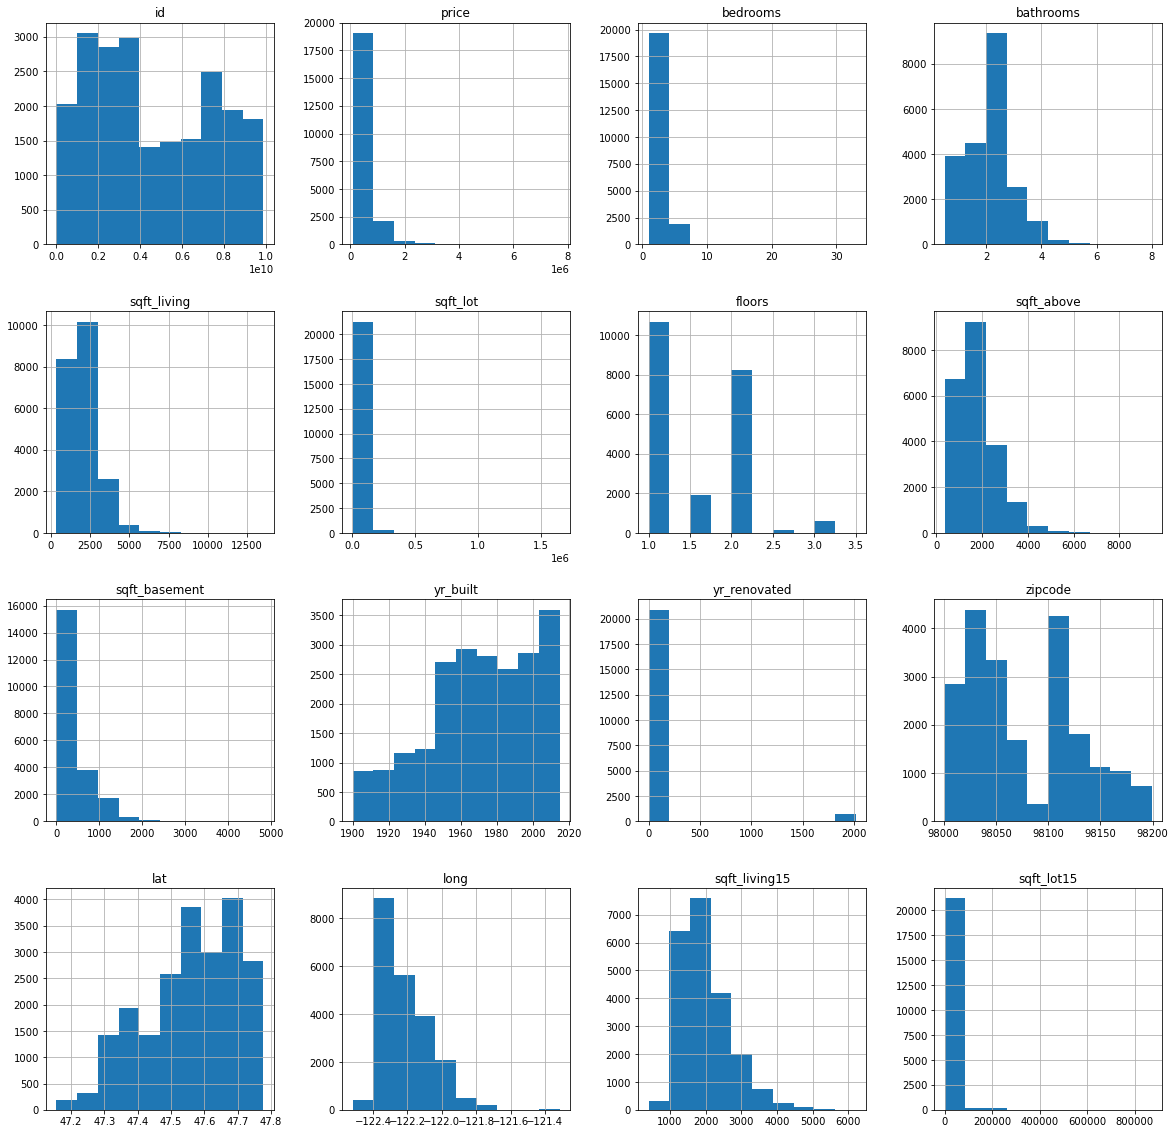

In [18]:
kc_data.hist(figsize=(20,20));

Checking for the location of our house sales

In [19]:
# Group the data by zipcode and calculate the mean latitude and longitude
zipcode_data = kc_data.groupby('zipcode').agg({'lat': 'mean', 'long': 'mean'}).reset_index()

# Create a map centered at the mean latitude and longitude of all the zipcodes
m = folium.Map(location=[kc_data['lat'].mean(), kc_data['long'].mean()], zoom_start=10)

# Add markers for each zipcode
for _, row in zipcode_data.iterrows():
    folium.Marker(location=[row['lat'], row['long']], popup=row['zipcode']).add_to(m)

# Display the map
m

### Bivariate EDA

 - Checking for the relationship between variables.
 - Our bivariate EDA involves checking for relationship between various features and the price.

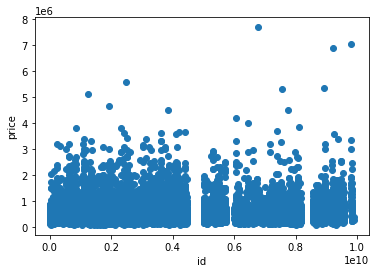

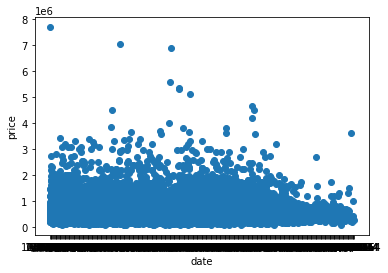

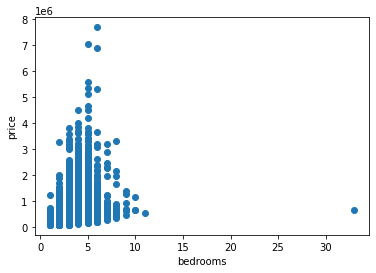

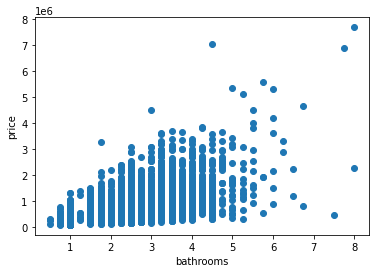

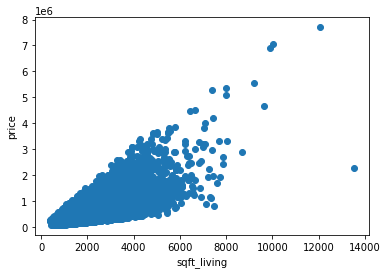

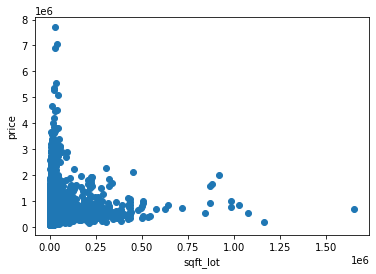

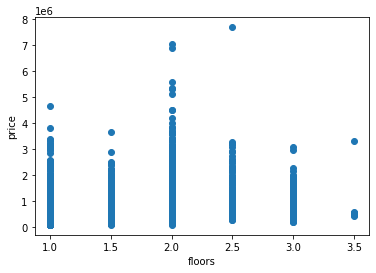

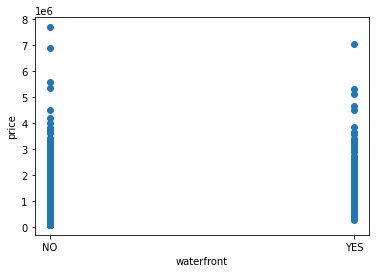

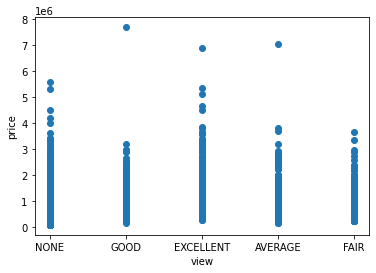

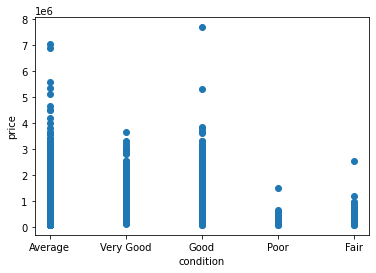

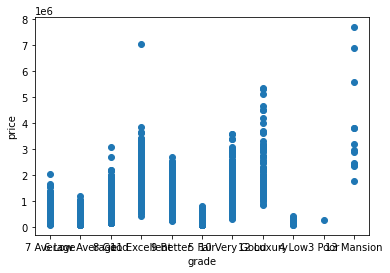

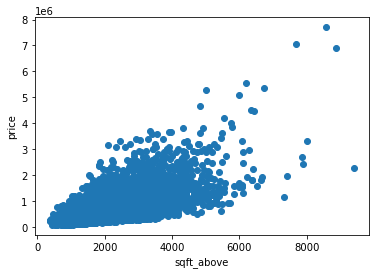

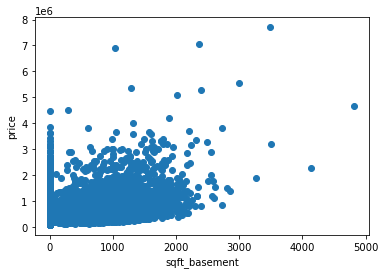

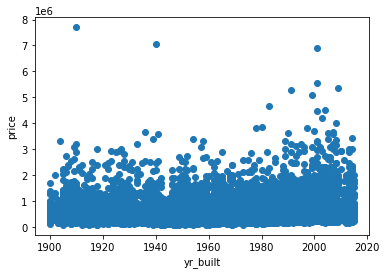

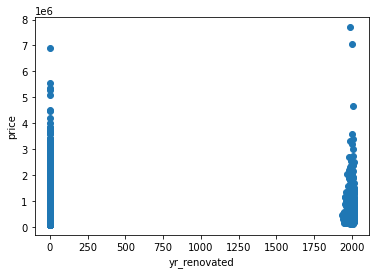

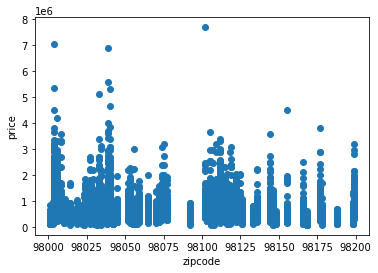

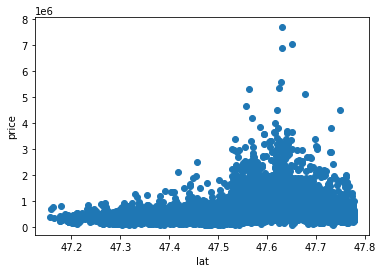

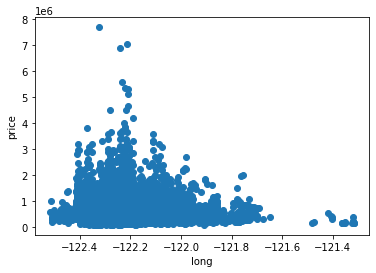

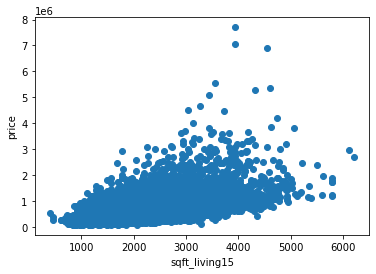

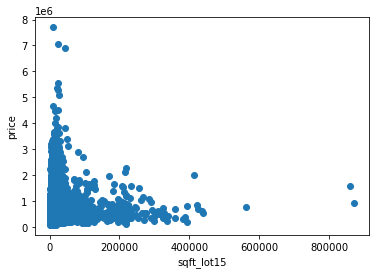

In [20]:
specific_col = 'price'
for col in kc_data.columns:
    if col != specific_col:
        plt.scatter(kc_data[col], kc_data[specific_col])
        plt.xlabel(col)
        plt.ylabel(specific_col)
        plt.show()

From the above visualizations we can see that the following features have the most linear relationship with price:

 - sqft_living
 - sqft_above
 - sqft_living15
 - sqft_basement

### What is the peak and low seasons for house sales?

In [21]:
kc_quarter =kc_data.copy()

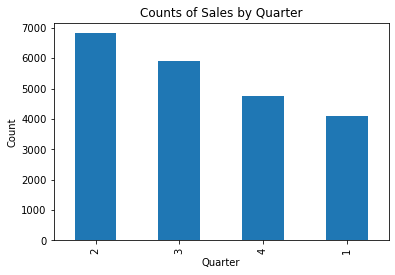

In [22]:
def plot_quarter_counts(data):
    dates = pd.to_datetime(data['date'], format='%m/%d/%Y')
    dates_column = dates.dt.quarter
    # get the counts for each quarter
    quarter_counts = dates_column.value_counts()
    quarter_counts.plot.bar()
    # plot a bar chart of the quarter counts
    plt.title('Counts of Sales by Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Count')
    plt.show()

plot_quarter_counts(kc_quarter)

We can see that:

 - The highest number of house sales are made in the second quarter of the year (Q2: April 1 - June 30) which fall in the Spring season.
 - The lowest number of house sales are made in the first quarter of the year (Q1: January 1 - March 31) which fall mostly in the Winter season.

### Multivariate Visualizations

We took the features with the most linear relationship to the price and then visualize them together

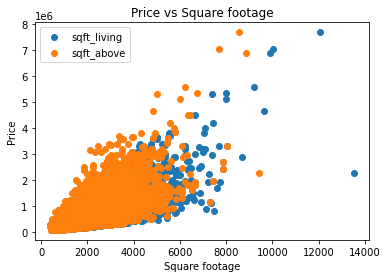

In [23]:
plt.scatter(kc_data['sqft_living'], kc_data['price'], label='sqft_living')
plt.scatter(kc_data['sqft_above'], kc_data['price'], label='sqft_above')
plt.xlabel('Square footage')
plt.ylabel('Price')
plt.title('Price vs Square footage')
plt.legend()
plt.show()

The data points of sqft_living and sqft_above lie close together and they show a strong positive linear relationship with the price

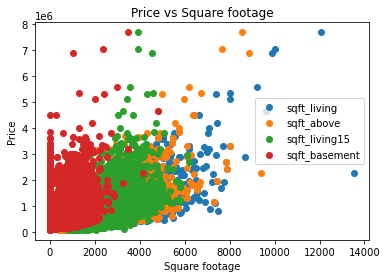

In [24]:
plt.scatter(kc_data['sqft_living'], kc_data['price'], label='sqft_living')
plt.scatter(kc_data['sqft_above'], kc_data['price'], label='sqft_above')
plt.scatter(kc_data['sqft_living15'], kc_data['price'], label='sqft_living15')
plt.scatter(kc_data['sqft_basement'], kc_data['price'], label='sqft_basement')
plt.xlabel('Square footage')
plt.ylabel('Price')
plt.title('Price vs Square footage')
plt.legend()
plt.show()

The data points of sqft_living, sqft_above, sqft_living15 and sqft_basement lie close together and they show a strong positive linear relationship with the price

## Feature Engineering

### Extracting the year from date sold

In [25]:
#converting date column from categorical (object) to numerical (int64)
kc_data['date'] = pd.to_datetime(kc_data['date'], format='%m/%d/%Y')
#Extract the year and create a new column
kc_data['year'] = kc_data['date'].dt.year
kc_data.drop('date', axis=1, inplace=True)

### Creating a new column named Age

The date (year) of the sale and the year built can be used to obtain the age of the house

In [26]:
#creating new column age
kc_data['age']= kc_data['year']-kc_data['yr_built']
kc_data['age']

0        59
1        63
2        82
3        49
4        28
         ..
21592     5
21593     1
21594     5
21595    11
21596     6
Name: age, Length: 21597, dtype: int64

 - Since we have obtained the age of the house we can drop the year and yr_built columns.
 - We drop the id of the house since it's not in the modelling

In [27]:
#dropping the columns year, yr_built, id
kc_data.drop(['year','yr_built', 'id'],axis=1, inplace=True )

In [28]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_renovated   21597 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  age   

In [29]:
kc_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,1788.60,285.72,68.76,98077.95,47.56,-122.21,1986.62,12758.28,43.32
std,367368.14,0.93,0.77,918.11,41412.64,0.54,827.76,439.82,364.04,53.51,0.14,0.14,685.23,27274.44,29.38
min,78000.00,1.00,0.50,370.00,520.00,1.00,370.00,0.00,0.00,98001.00,47.16,-122.52,399.00,651.00,-1.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,1190.00,0.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,18.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,1560.00,0.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,40.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,2210.00,550.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,63.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,9410.00,4820.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,115.00


The data doesn't have missing values, duplicates or placeholder values and all the columns are in their correct datatypes

### Correlation

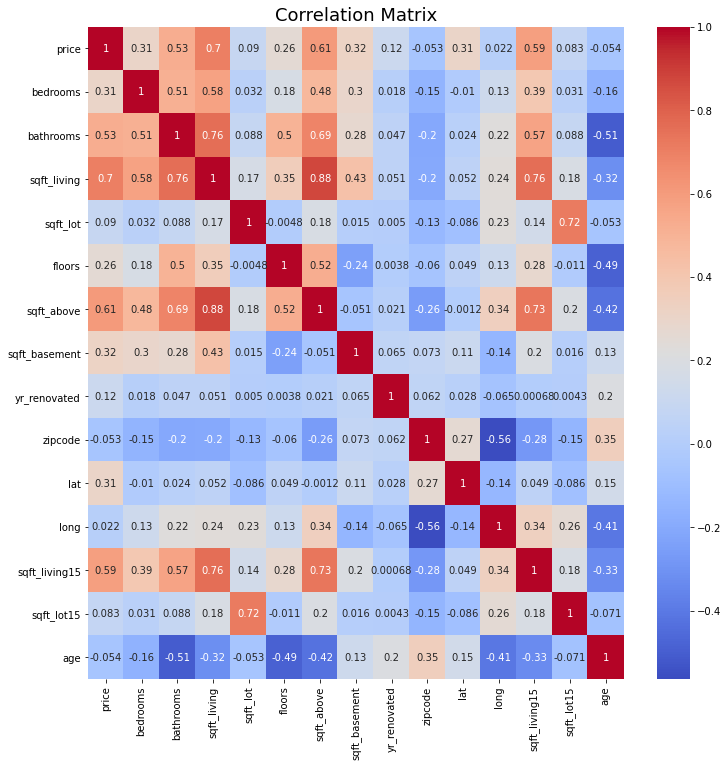

In [30]:
corr_matrix = kc_data.corr()
fig, ax = plt.subplots(figsize=(12,12))   # Set the figure size to 12 inches by 12 inches
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix', fontsize=18)
plt.show()

### Multicollinearity

How does each independent variable relate with the other?

In [31]:
df=kc_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous i
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.88
"(sqft_living, sqft_above)",0.88
"(sqft_living15, sqft_living)",0.76
"(sqft_living, sqft_living15)",0.76
"(bathrooms, sqft_living)",0.76
"(sqft_living, bathrooms)",0.76


 - The above pairs are the most highly collerated to each other.
 - Therefore adding all those variables will bring about multicollinearity in the model so we will drop some of them.

In [32]:
kc_data.drop(['sqft_above', 'sqft_living15', 'bathrooms'], axis=1, inplace=True)

In [33]:
kc_data.drop(['lat', 'long', 'zipcode'], axis=1, inplace=True)

### One Hot Encoding

In [31]:
kc_data['yr_renovated']= kc_data['yr_renovated'].apply(lambda x: 1 if x>0 else 0 )
kc_data['yr_renovated'].value_counts()

0    20853
1      744
Name: yr_renovated, dtype: int64

In [35]:
#one hot encoding waterfront,view and condition
kc_transform = pd.get_dummies(kc_data, columns=["waterfront",'view','condition'])
kc_transform = kc_transform.drop(["condition_Poor",'view_NONE','waterfront_NO'], axis=1)
kc_transform

,price,bedrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_renovated,sqft_lot15,age,waterfront_YES,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,condition_Average,condition_Fair,condition_Good,condition_Very Good
0,221900.00,3,1180,5650,1.00,7 Average,0.00,0,5650,59,0,0,0,0,0,1,0,0,0
1,538000.00,3,2570,7242,2.00,7 Average,400.00,1,7639,63,0,0,0,0,0,1,0,0,0
2,180000.00,2,770,10000,1.00,6 Low Average,0.00,0,8062,82,0,0,0,0,0,1,0,0,0
3,604000.00,4,1960,5000,1.00,7 Average,910.00,0,5000,49,0,0,0,0,0,0,0,0,1
4,510000.00,3,1680,8080,1.00,8 Good,0.00,0,7503,28,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.00,3,1530,1131,3.00,8 Good,0.00,0,1509,5,0,0,0,0,0,1,0,0,0
21593,400000.00,4,2310,5813,2.00,8 Good,0.00,0,7200,1,0,0,0,0,0,1,0,0,0
21594,402101.00,2,1020,1350,2.00,7 Average,0.00,0,2007,5,0,0,0,0,0,1,0,0,0
21595,400000.00,3,1600,2388,2.00,8 Good,0.00,0,1287,11,0,0,0,0,0,1,0,0,0


The reference categories for view will be None, for waterfront will be No and for condition will be poor condition.

### Label Encoding

In [36]:
#Convert grade column to numeric using label encoding
label_encoder = LabelEncoder()
kc_transform['grade'] = label_encoder.fit_transform(kc_transform['grade'])
kc_transform['grade'].value_counts()

8     8974
9     6065
10    2615
7     2038
0     1134
1      399
6      242
2       89
5       27
3       13
4        1
Name: grade, dtype: int64

In [37]:
kc_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21597 non-null  float64
 1   bedrooms             21597 non-null  int64  
 2   sqft_living          21597 non-null  int64  
 3   sqft_lot             21597 non-null  int64  
 4   floors               21597 non-null  float64
 5   grade                21597 non-null  int32  
 6   sqft_basement        21597 non-null  float64
 7   yr_renovated         21597 non-null  int64  
 8   sqft_lot15           21597 non-null  int64  
 9   age                  21597 non-null  int64  
 10  waterfront_YES       21597 non-null  uint8  
 11  view_AVERAGE         21597 non-null  uint8  
 12  view_EXCELLENT       21597 non-null  uint8  
 13  view_FAIR            21597 non-null  uint8  
 14  view_GOOD            21597 non-null  uint8  
 15  condition_Average    21597 non-null 

In [38]:
kc_transform.corr()['price'].sort_values(ascending=False)

price                  1.00
sqft_living            0.70
sqft_basement          0.32
bedrooms               0.31
view_EXCELLENT         0.30
waterfront_YES         0.26
floors                 0.26
view_GOOD              0.18
view_AVERAGE           0.15
yr_renovated           0.12
view_FAIR              0.09
sqft_lot               0.09
sqft_lot15             0.08
condition_Very Good    0.06
condition_Average      0.01
condition_Good        -0.03
condition_Fair        -0.05
age                   -0.05
grade                 -0.37
Name: price, dtype: float64

 - Sqft_living has the strongest positive correlation with price
 - Sqft_basement, bedrooms and view_EXCELLENT has low positive correlation with price
 - Grade, Age and condition have weak negative correlation

## Linear Regression

The first model will be that of price and the variable that is highly correlated to it

 - We will use an alpha of 0.05
 - We used forward filling to determine the best model
 
We choose to use RMSE as our error based metric because:

 - RMSE gives more weight to larger errors than smaller errors.
 - RMSE is more sensitive to outliers than other metrics such as MAE
 - It is commonly used to compare different models and choose the best performing one.

### Baseline model

In [39]:
#baseline model
X= kc_transform[['sqft_living']]
y=kc_transform['price']
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:38:34   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# fit the model 
pred_model = LinearRegression()
pred_model.fit(X, y)

# predict the values of the dependent variable 
y_pred = pred_model.predict(X)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)

RMSE: 261655.00451904474


### Interpretation
The baseline model is that of square foot living and price since square foot living has the highest correlation to price. The model is statistically significant since the F-statistic p-value is less than 0.05 and it explains 49.3% of the total variation of price.

 - An increase of 1 square foot in the living area leads to a price increase of approximately 281.
 

 - The model is off by 261656 in price.

Let's add more predictors to improve the accuracy of this model.

## Multiple Linear Regression

In [41]:
X= kc_transform[['sqft_living','sqft_basement']]
y=kc_transform['price']
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.051e+04
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:40:39   Log-Likelihood:            -3.0005e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.106e+04   4453.261     -9.220      0.000   -4.98e+04   -3.23e+04
sqft_living     276.6134      2.146    128.920      0.000     272.408     280.819
sqft_basement    20.6946      4.479      4.620      0.000      11.916      29.474
==============================================================================
Omnibus:                    14754.603   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           538977.524
Skew:                           2.807   Prob(JB):                         0.00
Kurtosis:                      26.821   Cond. No.                     5.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# fit the model 
pred_model1 = LinearRegression()
pred_model1.fit(X, y)

# predict the values of the dependent variable 
y_pred = pred_model1.predict(X)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)

RMSE: 261525.75896081686


### Interpretation

 - The model is that of square foot living , square foot basement and price.
 

 - The model is statistically significant since the F-statistic p-value is less than 0.05
 

 - The model explains 49.3% of the total variation of price same as the other model showing that adding the square foot basement doesn't improve the model.
 

 - The two coefficients are statistically significant since their t-statistic p values are less than 0.05.
 

 - The model is off by 261525 dollars in price which has reduced from the previous model.
 

 - An increase of 1 square foot in the living area leads to an increase of approximately 276.6 dollars in price.
 

 - An increase of 1 square foot in the basement area leads to an increase of approximately 20.7 dollars in price.
 

Let's add more predictors to improve the accuracy of this model.

In [43]:
X= kc_transform[['sqft_living','sqft_basement','bedrooms','view_EXCELLENT']]
y=kc_transform['price']
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     6321.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:44:08   Log-Likelihood:            -2.9902e+05
No. Observations:               21597   AIC:                         5.980e+05
Df Residuals:                   21592   BIC:                         5.981e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.598e+04   6483.583     13.261      0.000    7.33e+04    9.87e+04
sqft_living      296.1099      2.424    122.160      0.000     291.359     300.861
sqft_basement     12.8491      4.298      2.989      0.003       4.424      21.274
bedrooms       -5.144e+04   2258.361    -22.776      0.000   -5.59e+04    -4.7e+04
view_EXCELLENT   5.55e+05   1.44e+04     38.499      0.000    5.27e+05    5.83e+05
==============================================================================
Omnibus:                    13478.282   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           464463.605
Skew:                           2.466   Prob(JB):                         0.00
Kurtosis:                      25.177   Cond. No.                     1.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# fit the model 
pred_model2 = LinearRegression()
pred_model2.fit(X, y)

# predict the values of the dependent variable 
y_pred = pred_model2.predict(X)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)

RMSE: 249321.59062795973


### Interpretation

 - The model is that of square foot living , square foot basement, bedrooms, view_EXCELLENT and price.
 

 - The model is statistically significant since the p-value is less than 0.05 and it explains 54% of the total variation of price which has improved from the previous models making our model more accurate.
 

 - The coefficients are statistically significant since their pvalues are less than 0.05.
 

 - The model is off by $249321 in price which has reduced from the previous models.
 

 - An increase of 1 square foot in the living area leads to an increase of approximately $296.11 in price.
 

 - An increase of 1 square foot in the basement area leads to an increase of approximately $12.85 in price.
 

 - An increase of 1 bedroom leads to an decrease of approximately $56090  in price.
 

 - A house with an excellent view compared to that with no view leads to an increase of $552500 in price.
 

Let's add more predictors to improve the accuracy of this model.

In [45]:
X= kc_transform[['sqft_living','sqft_basement','bedrooms','view_EXCELLENT', 'waterfront_YES','floors']]
y=kc_transform['price']
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     4394.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:48:43   Log-Likelihood:            -2.9877e+05
No. Observations:               21597   AIC:                         5.976e+05
Df Residuals:                   21590   BIC:                         5.976e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.564e+04   7399.575      8.871      0.000    5.11e+04    8.01e+04
sqft_living      288.7641      2.700    106.937      0.000     283.471     294.057
sqft_basement     23.3275      4.796      4.864      0.000      13.927      32.728
bedrooms       -4.946e+04   2234.583    -22.134      0.000   -5.38e+04   -4.51e+04
view_EXCELLENT  3.455e+05   1.72e+04     20.129      0.000    3.12e+05    3.79e+05
waterfront_YES  5.445e+05   2.49e+04     21.874      0.000    4.96e+05    5.93e+05
floors          1.697e+04   3756.029      4.519      0.000    9611.470    2.43e+04
==============================================================================
Omnibus:                    13080.999   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           416972.977
Skew:                           2.384   Prob(JB):                         0.00
Kurtosis:                      23.991   Cond. No.                     3.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# fit the model 
pred_model3 = LinearRegression()
pred_model3.fit(X, y)

# predict the values of the dependent variable 
y_pred = pred_model3.predict(X)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)

RMSE: 246489.82517730808


### Interpretation

 - The model is that of square foot living , square foot basement, bedrooms, view_EXCELLENT, waterfront_yes ,floors and price.
 

 - The model is statistically significant since the F-statistic p-value is less than 0.05 and it explains 55% of the total variation of price which has improved from the previous models making our model more accurate.
 

 - The coefficients are statistically significant since their t-statistic p values are less than 0.05.
 

 - The model is off by $246200 in price which has reduced from the previous models.
 

 - An increase of 1 square foot in the living area leads to an increase of approximately $288.76 in price.
 

 - An increase of 1 square foot in the basement area leads to an increase of approximately $23.33 in price.
 

 - An increase of 1 bedroom leads to an decrease of approximately $49460 in price.
 

 - A house with an excellent view compared to that with no view leads to an increase of an $345500 in price.
 

 - A house on a waterfront compared to that not on a waterfront leads to an increase in 544500 542500 shillings in price.
 

 - An increase of one more floor in a house leads to an increase of $16970 in price.
 

Let's add more predictors to improve the accuracy of this model.

In [47]:
X= kc_transform[['sqft_living','sqft_basement','bedrooms','view_EXCELLENT', 
                 'waterfront_YES','floors','grade','age','condition_Fair']]
y=kc_transform['price']
model=sm.OLS(y, sm.add_constant(X))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     3572.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:51:18   Log-Likelihood:            -2.9754e+05
No. Observations:               21597   AIC:                         5.951e+05
Df Residuals:                   21587   BIC:                         5.952e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1290.9624    1.1e+04     -0.117      0.907   -2.29e+04    2.03e+04
sqft_living      285.8478      2.814    101.574      0.000     280.332     291.364
sqft_basement     13.7330      4.623      2.970      0.003       4.671      22.795
bedrooms       -4.325e+04   2136.247    -20.246      0.000   -4.74e+04   -3.91e+04
view_EXCELLENT  3.049e+05   1.62e+04     18.780      0.000    2.73e+05    3.37e+05
waterfront_YES  5.096e+05   2.35e+04     21.658      0.000    4.63e+05    5.56e+05
floors          8.064e+04   3781.025     21.329      0.000    7.32e+04    8.81e+04
grade          -1.951e+04    747.873    -26.092      0.000    -2.1e+04    -1.8e+04
age             2626.9890     64.029     41.028      0.000    2501.487    2752.491
condition_Fair -7.913e+04    1.8e+04     -4.394      0.000   -1.14e+05   -4.38e+04
==============================================================================
Omnibus:                    12894.735   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           471213.634
Skew:                           2.288   Prob(JB):                         0.00
Kurtosis:                      25.421   Cond. No.                     3.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
# fit the model 
pred_model4 = LinearRegression()
pred_model4.fit(X, y)

# predict the values of the dependent variable 
y_pred = pred_model4.predict(X)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)

RMSE: 232835.86406326134


 - On adding the variables that are lowly correlated to price , the model's accuracy improved to 59.9% and the RMSE has reduced to 232835.
 - So let's try adding all the variables and see how the model performs.
 - Before adding square foot lot and lot15 we need to log transform them

## Log Transformation

In [49]:
kc_copy= kc_transform.copy()

kc_copy["log(sqft_lot)"] = np.log(kc_copy["sqft_lot"])

# Visually inspect raw vs. transformed values
kc_copy[["sqft_lot", "log(sqft_lot)"]]

,sqft_lot,log(sqft_lot)
0,5650,8.64
1,7242,8.89
2,10000,9.21
3,5000,8.52
4,8080,9.00
...,...,...
21592,1131,7.03
21593,5813,8.67
21594,1350,7.21
21595,2388,7.78


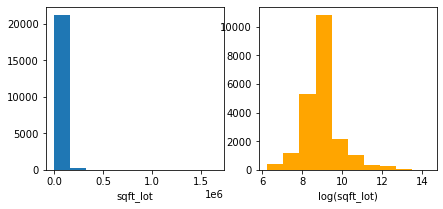

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(kc_copy["sqft_lot"])
ax1.set_xlabel("sqft_lot")
ax2.hist(kc_copy["log(sqft_lot)"], color="orange")
ax2.set_xlabel("log(sqft_lot)");

In [51]:
kc_copy["log(sqft_lot15)"] = np.log(kc_copy["sqft_lot15"])

# Visually inspect raw vs. transformed values
kc_copy[["sqft_lot15", "log(sqft_lot15)"]]

,sqft_lot15,log(sqft_lot15)
0,5650,8.64
1,7639,8.94
2,8062,8.99
3,5000,8.52
4,7503,8.92
...,...,...
21592,1509,7.32
21593,7200,8.88
21594,2007,7.60
21595,1287,7.16


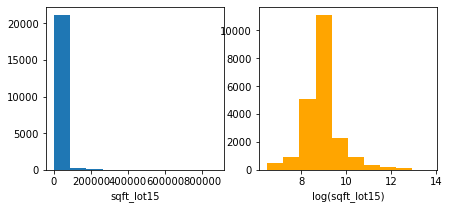

In [52]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(kc_copy["sqft_lot15"])
ax1.set_xlabel("sqft_lot15")
ax2.hist(kc_copy["log(sqft_lot15)"], color="orange")
ax2.set_xlabel("log(sqft_lot15)");

In [53]:
kc_copy.drop(['sqft_lot15',"sqft_lot"],axis=1, inplace= True)

### Before Transformation

In [56]:
X = kc_transform.drop('price', axis=1)
y = kc_transform['price']
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit() 
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1878.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:54:58   Log-Likelihood:            -2.9721e+05
No. Observations:               21597   AIC:                         5.945e+05
Df Residuals:                   21578   BIC:                         5.946e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.298e+04    

In [55]:
# fit the model
pred_model5 = LinearRegression()
pred_model5.fit(X, y)

# predict the values of the dependent variable
y_pred = pred_model5.predict(X)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)

RMSE: 229308.23230450405


### After Transformation

In [57]:
X = kc_copy.drop('price', axis=1)
y = kc_copy['price']
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit() 
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1936.
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:55:17   Log-Likelihood:            -2.9701e+05
No. Observations:               21597   AIC:                         5.941e+05
Df Residuals:                   21578   BIC:                         5.942e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.212e+05   4

In [58]:
# fit the model 
pred_model6 = LinearRegression()
pred_model6.fit(X, y)

# predict the values of the dependent variable 
y_pred = pred_model6.predict(X)

# calculate the RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print('RMSE:', rmse)

RMSE: 227171.42435161455


#### Why transform?

 - The first model is without the log transformation and the second one is after the log transformation. The second one is better since it explains 61.7% of the total variation in price compared to the first model that explains 61% of the variation in price .
 - The RMSE of the second model is also lower thus we'll use the second model.
 - Interpreting the second model, some variables are not significant since their p-value is more than 0.05 but we can't drop them because that will mean we'll use them as a reference category and we already have a reference category.

This is our final model.

### Interpretation

 - The model is that of bedrooms, sqft_living, floors, grade,sqft_basement,yr_renovated, age, waterfront_YES, view_AVERAGE,view_EXCELLENT, view_FAIR, view_GOOD, condition_Average,condition_Fair, condition_Good, condition_Very Good,log(sqft_lot), log(sqft_lot15) and price.
 

 - The model is statistically significant since the F-statistic p-value is less than 0.05 and it explains 61.7%% of the total variation of price which has improved from the previous models making our model more accurate.
 

 - Most of the predictor variables are statistically significant apart from condition fair and condition average.
 

 - The model is off by $227171 in price which has reduced from the previous models.
 

 - An increase of 1 square foot in the living area leads to an increase of approximately $308.73 in price.
 

 - An increase of 1 square foot in the basement area leads to a decrease of approximately $36.72 in price.
 

 - An increase of 1 bedroom leads to an decrease of approximately $409200 in price.
 

 - A house graded higher by one unit leads to a decrease of approximately $19990 in price.
 

 - An increase of 1 year in the age of the house leads to an increase of approximately $2154.77 in price.
 

 - Renovating a house leads to an increase of your price by $63110 in price.
 

 - A house on a waterfront compared to that not on a waterfront leads to an increase in $502500 in price.
 

 - A house with an average view compared to that with no view leads to an increase of an $90700 in price.
 

 - A house with an excellent view compared to that with no view leads to an increase of an $340600 in price.
 

 - A house with a good view compared to that with no view leads to an increase of an $159900 in price.
 

 - A house with a fair view compared to that with no view leads to an increase of an $140200 in price.
 

 - An increase of one more floor in a house leads to an increase of $31440 in price.
 

 - A house in an average condition compared to that in poor condition leads to an increase of an $80020 in price.
 

 - A house in fair condition compared to that in poor condition leads to an increase of an $41180 in price.
 

 - A house in good condition compared to that in poor condition leads to an increase of an $103100 in price.
 

 - A house in very good condition compared to that in poor condition leads to an increase of an $138300 in price.
 

 - For each increase of 1% in square foot lot there is decrease of $386.8 in price.
 

 - For each increase of 1% in square foot lot15 there is decrease of $135.6 in price.
 

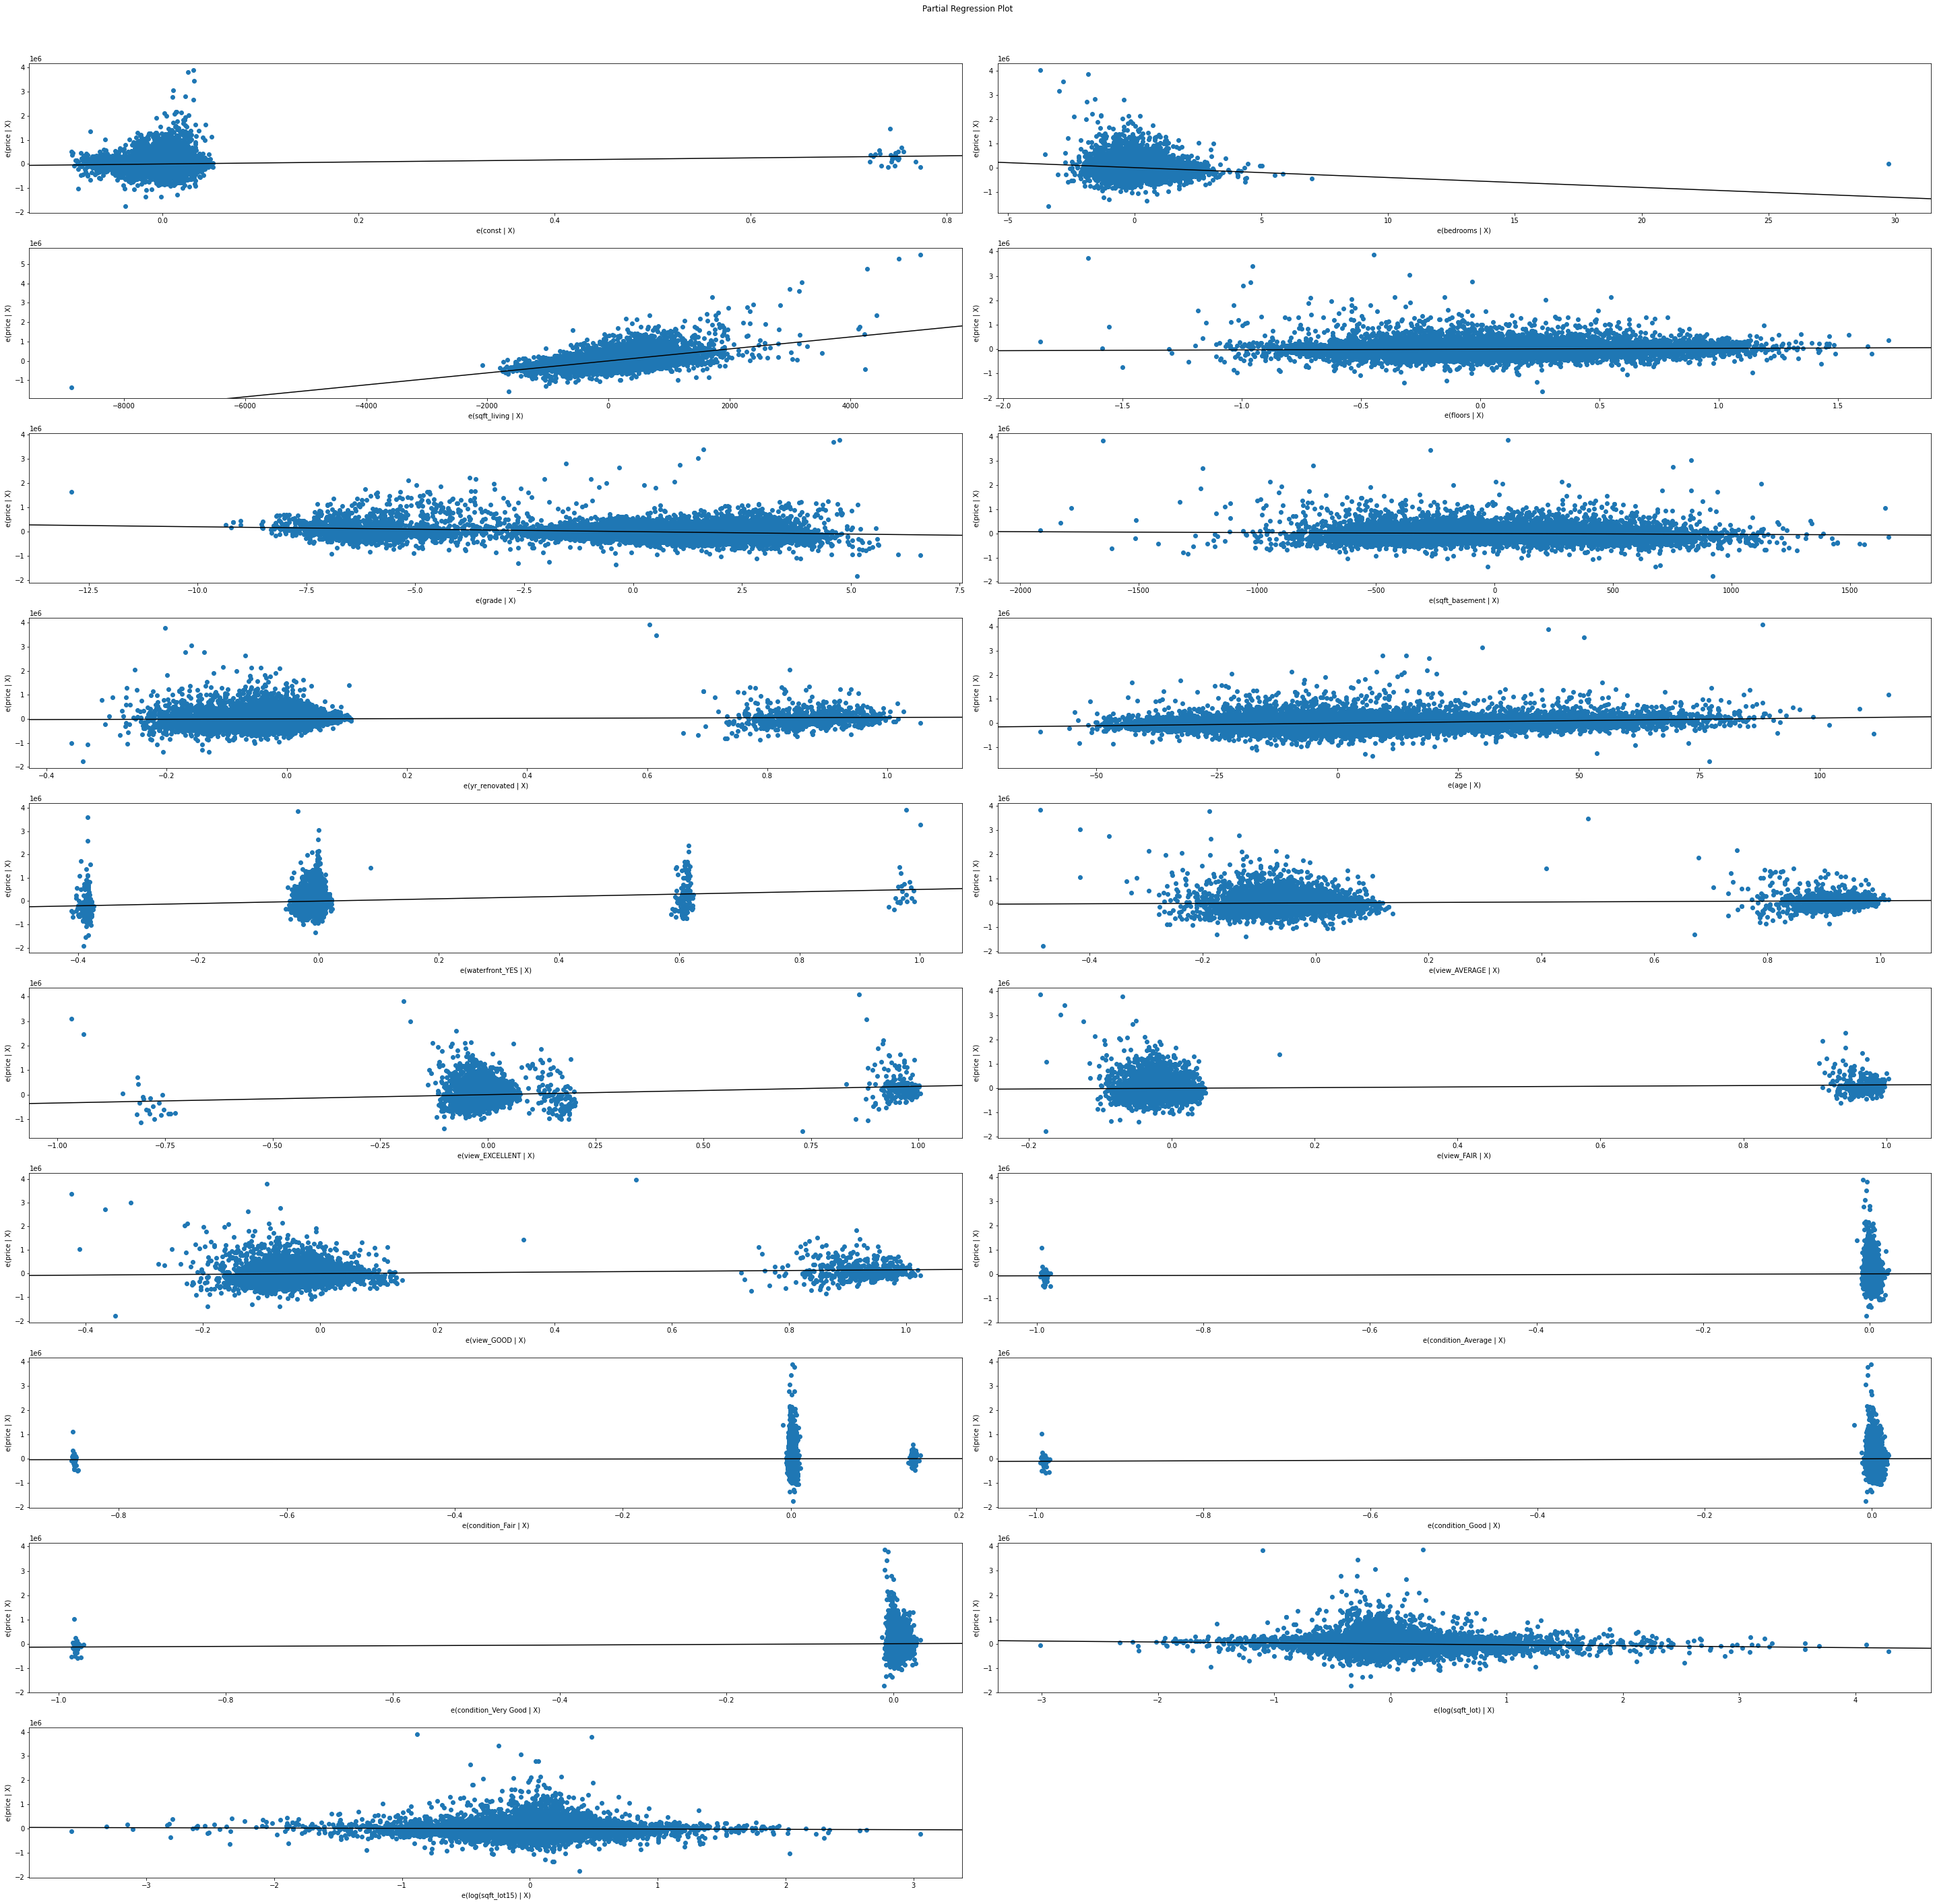

In [59]:
fig= plt.figure( figsize=(40,40))
sm.graphics.plot_partregress_grid(results1, exog_idx=list(X.columns.values),fig=fig)
plt.show()

On visualizing the partial regression plots we can see that the predictor variables have a linear relationship with price thus concluding that they are beneficial to our model.

### Standardizing the model

In [60]:
for col in kc_copy:
    kc_copy[col]=(kc_copy[col]-kc_copy[col].mean())/kc_copy[col].std()
    
X = kc_copy.drop('price', axis=1)
y = kc_copy['price']
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit() 
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1936.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:02:10   Log-Likelihood:                -20264.
No. Observations:               21597   AIC:                         4.057e+04
Df Residuals:                   21578   BIC:                         4.072e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.788e-17    

In [61]:
results1.params.sort_values(ascending=False)

sqft_living            0.77
age                    0.17
condition_Good         0.12
waterfront_YES         0.11
view_EXCELLENT         0.11
condition_Average      0.10
condition_Very Good    0.10
view_GOOD              0.07
view_AVERAGE           0.05
view_FAIR              0.05
floors                 0.05
yr_renovated           0.03
condition_Fair         0.01
const                 -0.00
log(sqft_lot15)       -0.03
sqft_basement         -0.04
log(sqft_lot)         -0.09
bedrooms              -0.10
grade                 -0.13
dtype: float64

 - We can see that square foot living has the highest influence on the price of the house.
 - The variables that have a major influence on the price of the house are; square foot living, age of the house,good condition of the house,if the house is on a waterfront and has an excellent view.
 - The variables that has the least influence on the price of the house are; grade,number of bedrooms,sqft lot,sqft basement and sqft lot 15.

## Conclusion

 - The variables that have a major influence on the price of the house are; square foot living, age of the house,good condition of the house,if the house is on a waterfront and has an excellent view.
 - The variables that has the least influence on the price of the house are; grade,number of bedrooms,sqft lot,sqft basement and sqft lot 15.
 
We can also see that:


 - The highest number of house sales are made in the second quarter of the year (Q2: April 1 - June 30) which fall in the Spring season
 - The lowest number of house sales are made in the first quarter of the year (Q1: January 1 - March 31) which fall mostly in the Winter season

## Recommendations

 - Revonate their house since this increases the value of the house
 - Ensure that the houses are in good condition before putting it into the market for sale
 - Increase square footage of living space
 - Put up their houses for sale in peak season-Spring

## Future work

 - Reducing noise in the data to improve the accuracy of our model.
 - Additionally investigate certain features, such as constructional/architectural values of the house, to see what trends we could discern from that.